imports

In [130]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [131]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
y_train_reshaped = y_train.ravel()

x_test_reshaped = x_test.reshape(x_test.shape[0], -1)
y_test_reshaped = y_test.ravel()


In [133]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

meta_data = unpickle("../usu_zapocet/cifar-100-python/meta")

fine_label_names = np.array([label.decode('utf-8') for label in meta_data[b'fine_label_names']])
coarse_label_names = np.array([label.decode('utf-8') for label in meta_data[b'coarse_label_names']])

print(fine_label_names)
print(coarse_label_names)

['apple' 'aquarium_fish' 'baby' 'bear' 'beaver' 'bed' 'bee' 'beetle'
 'bicycle' 'bottle' 'bowl' 'boy' 'bridge' 'bus' 'butterfly' 'camel' 'can'
 'castle' 'caterpillar' 'cattle' 'chair' 'chimpanzee' 'clock' 'cloud'
 'cockroach' 'couch' 'crab' 'crocodile' 'cup' 'dinosaur' 'dolphin'
 'elephant' 'flatfish' 'forest' 'fox' 'girl' 'hamster' 'house' 'kangaroo'
 'keyboard' 'lamp' 'lawn_mower' 'leopard' 'lion' 'lizard' 'lobster' 'man'
 'maple_tree' 'motorcycle' 'mountain' 'mouse' 'mushroom' 'oak_tree'
 'orange' 'orchid' 'otter' 'palm_tree' 'pear' 'pickup_truck' 'pine_tree'
 'plain' 'plate' 'poppy' 'porcupine' 'possum' 'rabbit' 'raccoon' 'ray'
 'road' 'rocket' 'rose' 'sea' 'seal' 'shark' 'shrew' 'skunk' 'skyscraper'
 'snail' 'snake' 'spider' 'squirrel' 'streetcar' 'sunflower'
 'sweet_pepper' 'table' 'tank' 'telephone' 'television' 'tiger' 'tractor'
 'train' 'trout' 'tulip' 'turtle' 'wardrobe' 'whale' 'willow_tree' 'wolf'
 'woman' 'worm']
['aquatic_mammals' 'fish' 'flowers' 'food_containers'
 'frui

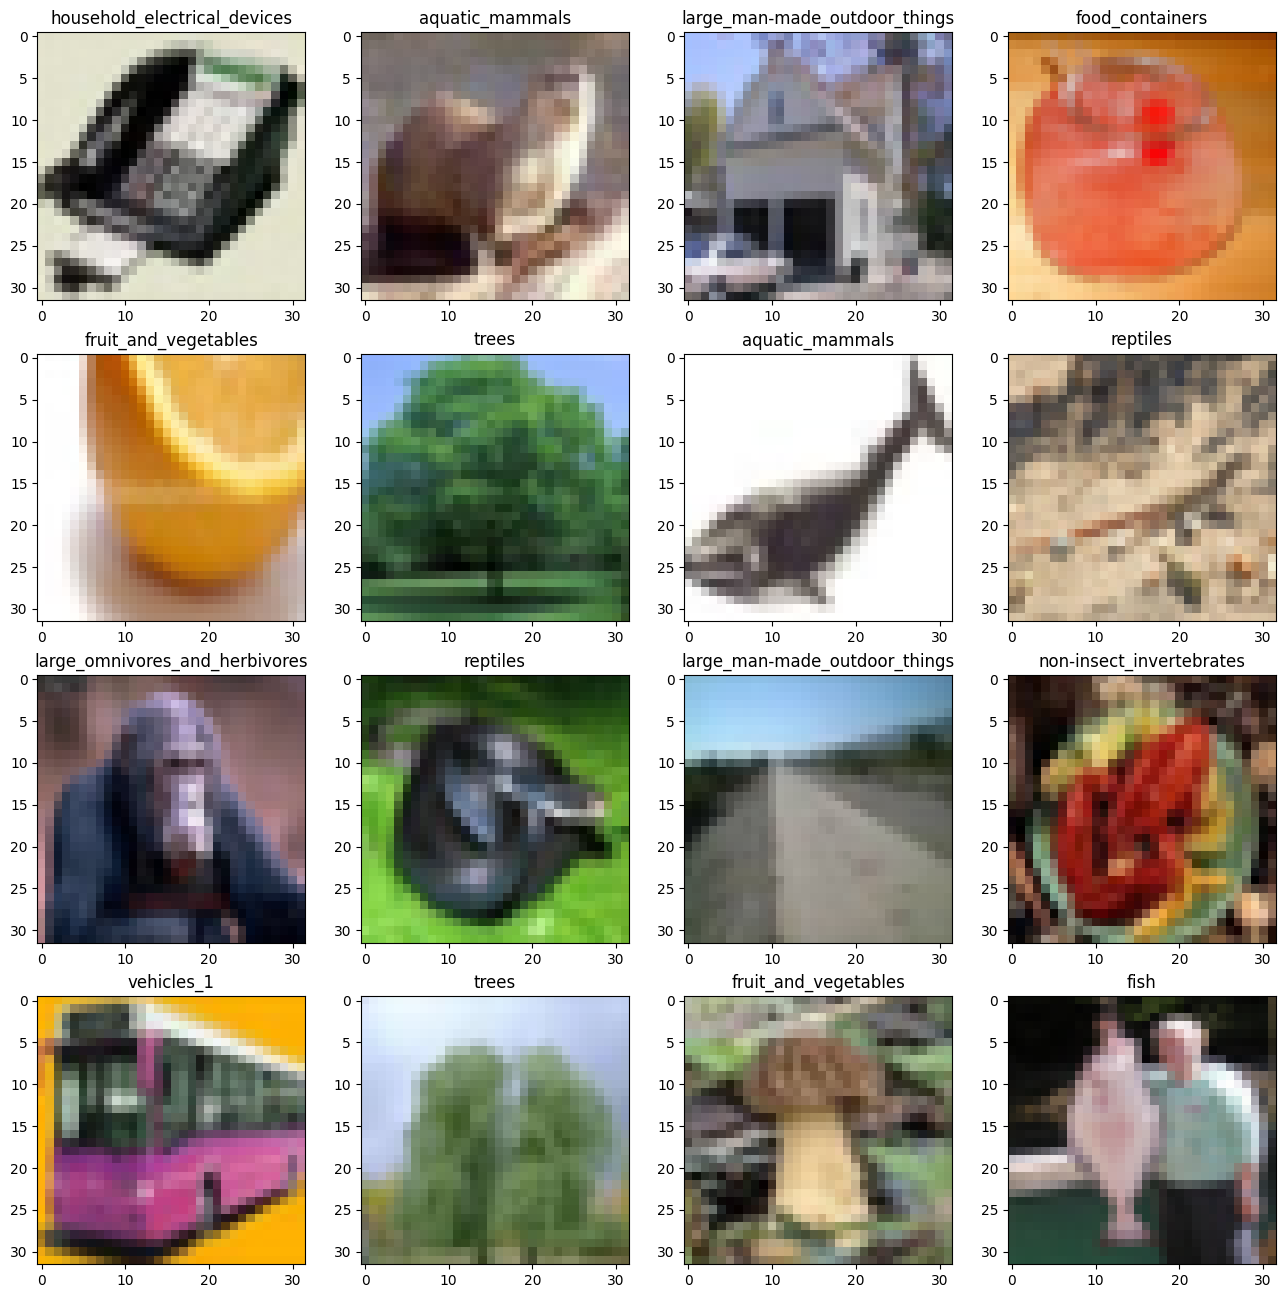

In [150]:
plt.figure(figsize=(16, 16))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.title(coarse_label_names[y_train_reshaped[rand_num]])
  plt.imshow(x_train[rand_num])

In [134]:
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - acc: 0.1931 - loss: 2.6267 - val_acc: 0.3252 - val_loss: 2.2218
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - acc: 0.3331 - loss: 2.1595 - val_acc: 0.3644 - val_loss: 2.0776
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - acc: 0.3913 - loss: 1.9668 - val_acc: 0.4087 - val_loss: 1.9165
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - acc: 0.4305 - loss: 1.8354 - val_acc: 0.3669 - val_loss: 2.0958
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - acc: 0.4584 - loss: 1.7405 - val_acc: 0.4398 - val_loss: 1.8124
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - acc: 0.4875 - loss: 1.6563 - val_acc: 0.4460 - val_loss: 1.7758
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - acc: 0.5049 - loss: 1.5876 - val_acc: 0.4816 - val_loss: 1.6839
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - acc: 0.5272 - loss: 1.5157 - val_acc: 0.4811 - val_loss: 1.6813
Epoch 9/10
1250/1250 ━━━

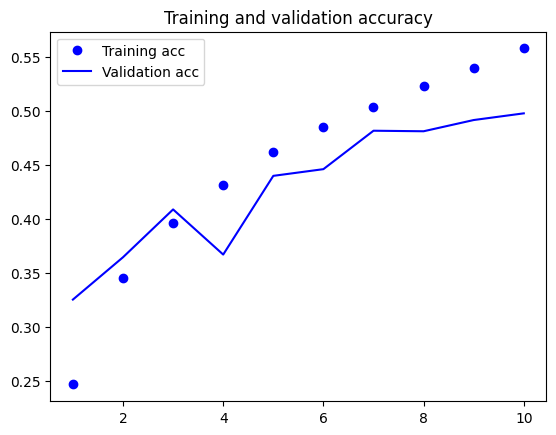

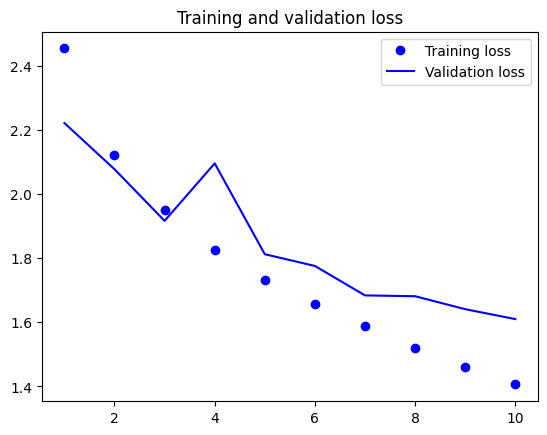

In [141]:
import tensorflow as tf
from tensorflow.keras import datasets, models, optimizers #type: ignore
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

def get_model():
    model = models.Sequential()
    model.add(Input(shape=(32,32,3)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(20, activation='softmax'))
    return model


(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

model = get_model()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc*100)
training_plot(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


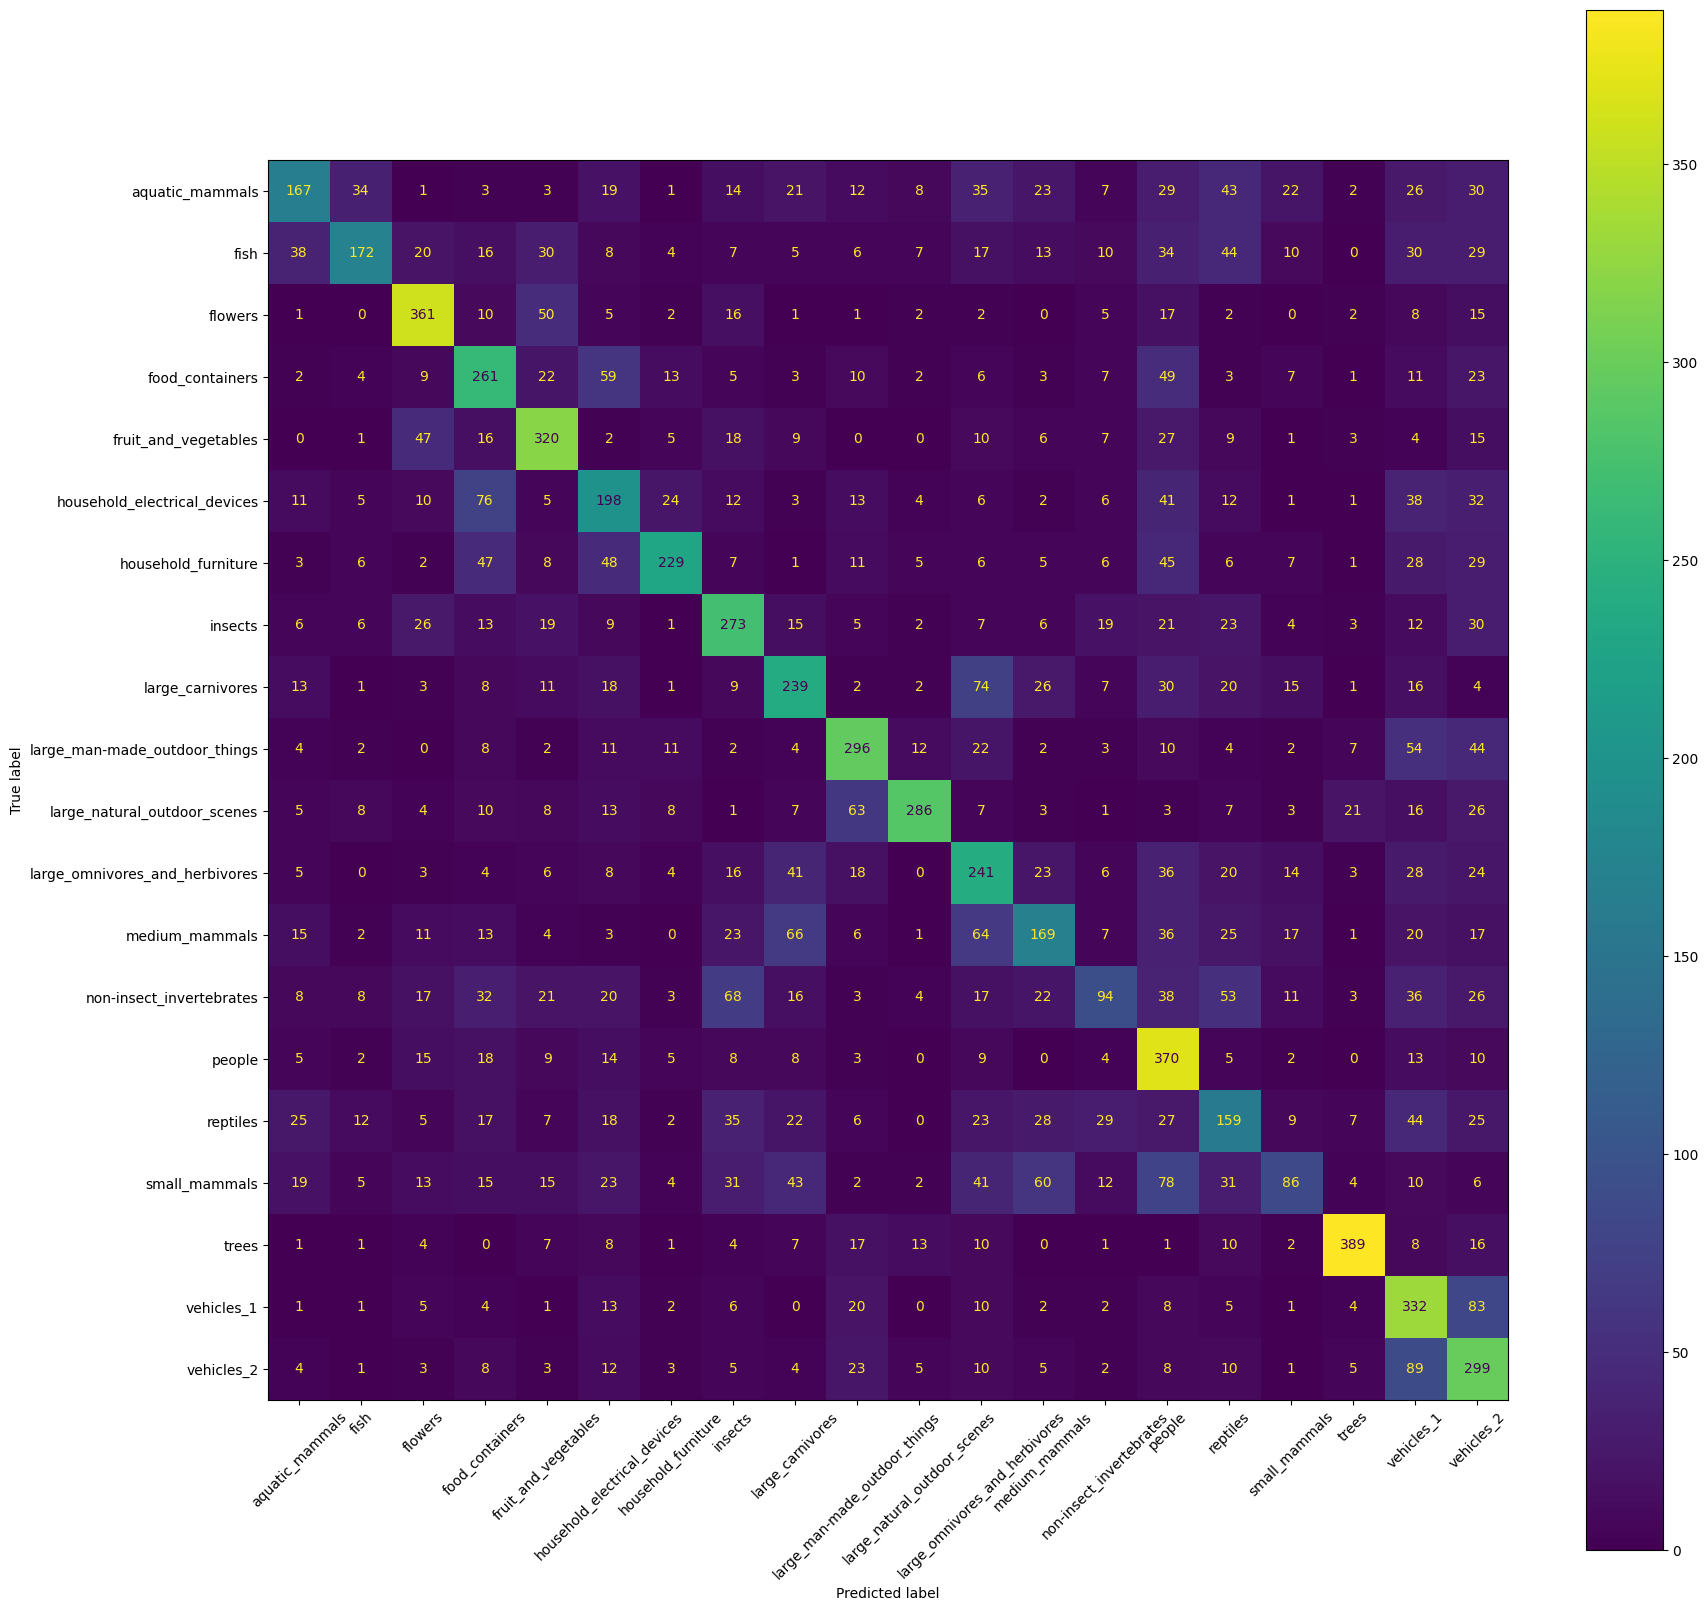

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_hat = model.predict(test_images)

cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_hat, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=coarse_label_names)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax, xticks_rotation=45)


In [146]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(test_labels, axis=1), np.argmax(y_hat, axis=1), target_names=coarse_label_names))

                                precision    recall  f1-score   support

               aquatic_mammals       0.50      0.33      0.40       500
                          fish       0.63      0.34      0.45       500
                       flowers       0.65      0.72      0.68       500
               food_containers       0.45      0.52      0.48       500
          fruit_and_vegetables       0.58      0.64      0.61       500
  household_electrical_devices       0.39      0.40      0.39       500
           household_furniture       0.71      0.46      0.56       500
                       insects       0.49      0.55      0.52       500
              large_carnivores       0.46      0.48      0.47       500
 large_man-made_outdoor_things       0.57      0.59      0.58       500
  large_natural_outdoor_scenes       0.81      0.57      0.67       500
large_omnivores_and_herbivores       0.39      0.48      0.43       500
                medium_mammals       0.42      0.34      0.38  